Agradecimientos: Dr.Carlos Contreras, Departamento ingeniería industrial

## Problema del vendedor viajero (TSP)

Un vendedor debe recorrer n ciudades y regresar a la ciudad de
partida, pasando solo una vez por cada ciudad. Entonces, consiste
en encontrar un ruta de costo mínimo de un conjunto de ciudades,
iniciando y terminando en la misma ciudad y visitando cada ciudad
exactamente una vez.

Sea $G = (V, A)$ un grafo completo, donde $V = {1, . . . , n}$ es el
conjunto de v´ertices y A es el conjunto de aristas, que contiene un
arista $(i, j)$ por cada par de vertices. Los vertices $i = {2, . . . , n}$
corresponden a las ciudades a visitar y el v´ertice 1 es la ciudad
inicial. A cada arista $(i, j)$ se le asocia un valor no negativo $c_{ij}$ , que
representa el coste de viajar del vertice $i$ al $j$ y $i ̸= j$. Si G es un
grafo dirigido, la matriz de costos $C$ es asimetrica. Mientras que, si
$c_{ij} = c_{ji}$ para todo $(i, j) \in A$, la matriz de costos es simetrica.

Modelo

Variables:

$x_{ij}=\left\{\begin{matrix}
1, \text{si la arista (i,j) es parte de la ruta}\\ 
0, \text{En otro caso}
\end{matrix}\right.$

F.O

$\text{min} \sum_{(i,j) \in A} c_{ij}x_{ij}$

S.T

$\rightarrow \sum_{j \in V: j\neq i}x_{ij}=1; \forall i \in V$

$\rightarrow \sum_{i \in V: i\neq j}x_{ij}=1; \forall j \in V$

$ \rightarrow u_i-u_j+1 \leq n(1-x_{ij}); \forall (i,j) \in V: i >1, i\neq j$

$\rightarrow x_{ij} \in \{0,1\} ; \forall (i,j) \in A$

$\rightarrow 1\leq u_i \leq n; \forall i \in V$

#### Implementación pulp

In [1]:
import pulp

# Crear un problema de minimización
problema = pulp.LpProblem("Problema_de_Rutas_Mínimas", pulp.LpMinimize)

#Matriz de costos
c=[[0,12,29,22,13,24],[12,0,19,3,25,6],[29,19,0,21,23,28],[22,3,21,0,4,5],[13,25,23,4,0,16],[24,26,28,5,16]]

# Conjuntos de nodos y aristas
n=len(c)
V = range(n)  # Donde 'n' es el número de nodos
A = [(i, j) for i in V for j in V if i != j]

# Variables binarias x_ij
x = pulp.LpVariable.dicts("x", A, 0, 1, pulp.LpBinary)
u = pulp.LpVariable.dicts("u", V, 0, n, pulp.LpInteger )

# Función objetivo
problema += pulp.lpSum(c[i][j] * x[(i, j)] for (i, j) in A)

# Restricciones
for i in V:
    problema += pulp.lpSum(x[(i, j)] for j in V if i != j) == 1

for j in V:
    problema += pulp.lpSum(x[(i, j)] for i in V if i != j) == 1

for i in V:
    for j in V:
        if(i!=j and i>=1):
            problema += u[i]-u[j]+1<=n*(1-x[(i,j)])
    
# Resolver el problema
problema.solve()

# Imprimir la solución
print("Status:", pulp.LpStatus[problema.status])
for (i, j) in A:
    if x[(i, j)].varValue == 1:
        print(f"x({i},{j}) = 1")
print("Optimal value =", pulp.value(problema.objective))

Status: Optimal
x(0,2) = 1
x(1,5) = 1
x(2,1) = 1
x(3,4) = 1
x(4,0) = 1
x(5,3) = 1
Optimal value = 76.0


#### Representación euclidiana del problema

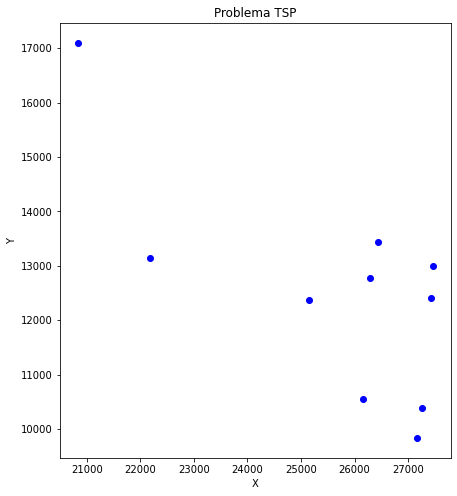

In [2]:
import matplotlib.pyplot as plt
import random

path='wi29.tsp'
file=[[float(j) for j in i.split(' ')] for i in open(path,'r').read().split('\n')[7:-1]]
file=random.sample(file, 10) #Reduzco el tamaño por tiempos de computo

x_coord=[i[1] for i in file]
y_coord=[i[2] for i in file]

plt.figure(figsize=(7,8))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Problema TSP")

plt.scatter(x=x_coord,y=y_coord, color='blue',zorder=1)

In [3]:
import math
c=[]
for i in range(len(file)):
    aux=[]
    for j in range(len(file)):
        pt1=(file[i][1],file[i][2])
        pt2=(file[j][1],file[j][2])
        aux.append(math.dist(pt1,pt2))
    c.append(aux)

In [4]:
#Usamos el mismo codigo

import pulp

# Crear un problema de minimización
problema = pulp.LpProblem("Problema_de_Rutas_Mínimas", pulp.LpMinimize)


# Conjuntos de nodos y aristas
n=len(c)
V = range(n)  # Donde 'n' es el número de nodos
A = [(i, j) for i in V for j in V if i != j]

# Variables binarias x_ij
x = pulp.LpVariable.dicts("x", A, 0, 1, pulp.LpBinary)
u = pulp.LpVariable.dicts("u", V, 0.9, n+0.1, pulp.LpInteger )

# Función objetivo
problema += pulp.lpSum(c[i][j] * x[(i, j)] for (i, j) in A)

# Restricciones
for i in V:
    problema += pulp.lpSum(x[(i, j)] for j in V if i != j) == 1

for j in V:
    problema += pulp.lpSum(x[(i, j)] for i in V if i != j) == 1

for i,j in A:
    if(i>=1):
        problema += u[i]-u[j]+1<=n*(1-x[(i,j)])
    
# Resolver el problema
problema.solve()

# Imprimir la solución
print("Status:", pulp.LpStatus[problema.status])
for (i, j) in A:
    if x[(i, j)].varValue == 1:
        print(f"x({i},{j}) = 1")
print("Optimal value =", pulp.value(problema.objective))

Status: Optimal
x(0,5) = 1
x(1,9) = 1
x(2,7) = 1
x(3,8) = 1
x(4,3) = 1
x(5,6) = 1
x(6,4) = 1
x(7,0) = 1
x(8,1) = 1
x(9,2) = 1
Optimal value = 22323.87917739577


[(0, 9), (1, 2), (2, 6), (3, 8), (4, 5), (5, 0), (6, 3), (7, 4), (8, 7), (9, 1)]


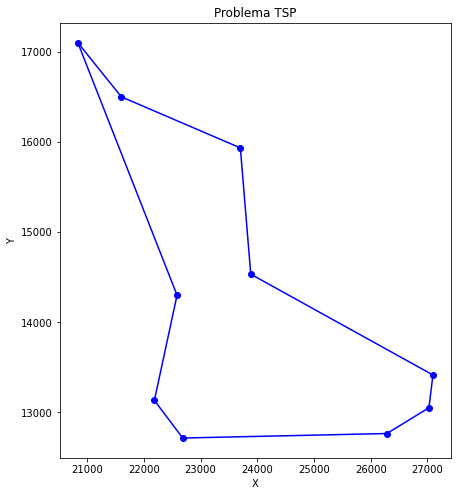

In [19]:
arcos_solucion=[(i,j) for i,j in A if x[(i,j)].varValue==1]
print(arcos_solucion)

plt.figure(figsize=(7,8))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Problema TSP")

plt.scatter(x=x_coord,y=y_coord, color='blue',zorder=1)

for i,j in arcos_solucion:
    plt.plot([x_coord[i],x_coord[j]],[y_coord[i],y_coord[j]],color='blue',zorder=1)
    
plt.show()